<a href="https://colab.research.google.com/github/Kittisak-M/Data_Science_Library/blob/main/sklearn_optimal_number_of_clusters_elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimal number of clusters (Elbow method)


---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/
* kaggle: https://www.kaggle.com/prasertk/
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---


<a href=https://youtu.be/U5m1tHawgSI><img src=https://i.ytimg.com/vi/U5m1tHawgSI/mqdefault.jpg width=560 width=315/><p>Play YouTube Video</p></a>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")

pd.Timestamp.now()

pandas  version = 2.2.1
numpy   version = 1.26.4


Timestamp('2024-04-10 09:09:23.863204')

## create test data


In [ ]:
N_CLUSTERS = 5

In [ ]:
from sklearn.datasets import make_blobs, make_classification

X, y = make_blobs(
    n_samples=100, centers=N_CLUSTERS, n_features=2, center_box=(0, 30), random_state=7
)
# X, y = make_classification(n_samples=100, n_classes=4, n_clusters_per_class=1, n_features=2, n_redundant=0)

In [ ]:
X[:5]

array([[13.05750149, 22.89704126],
       [ 0.58090948, 21.59446511],
       [15.12176883,  0.82501345],
       [ 7.79485307, 16.13445408],
       [13.08163581,  2.53486478]])

In [ ]:
y

array([1, 0, 3, 4, 3, 1, 2, 0, 0, 0, 1, 4, 4, 0, 3, 1, 2, 2, 0, 3, 2, 4,
       4, 4, 2, 3, 1, 3, 0, 2, 4, 0, 0, 1, 3, 3, 4, 2, 4, 2, 1, 3, 1, 1,
       1, 4, 4, 1, 1, 4, 2, 3, 0, 0, 3, 0, 3, 4, 3, 4, 1, 1, 2, 2, 2, 1,
       1, 2, 0, 3, 2, 1, 0, 2, 0, 0, 3, 3, 3, 3, 4, 2, 4, 1, 1, 0, 4, 2,
       4, 2, 0, 0, 2, 4, 1, 0, 3, 2, 3, 4])

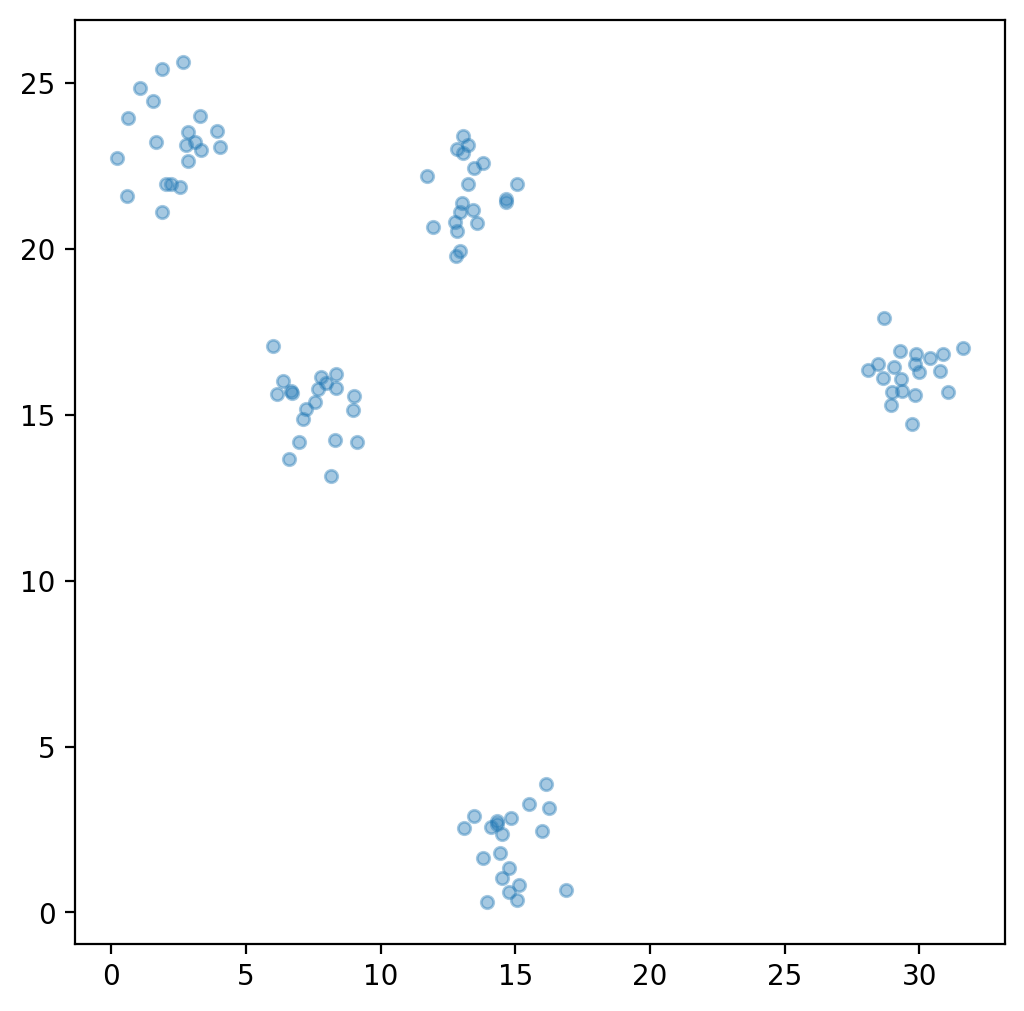

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, alpha=0.4)

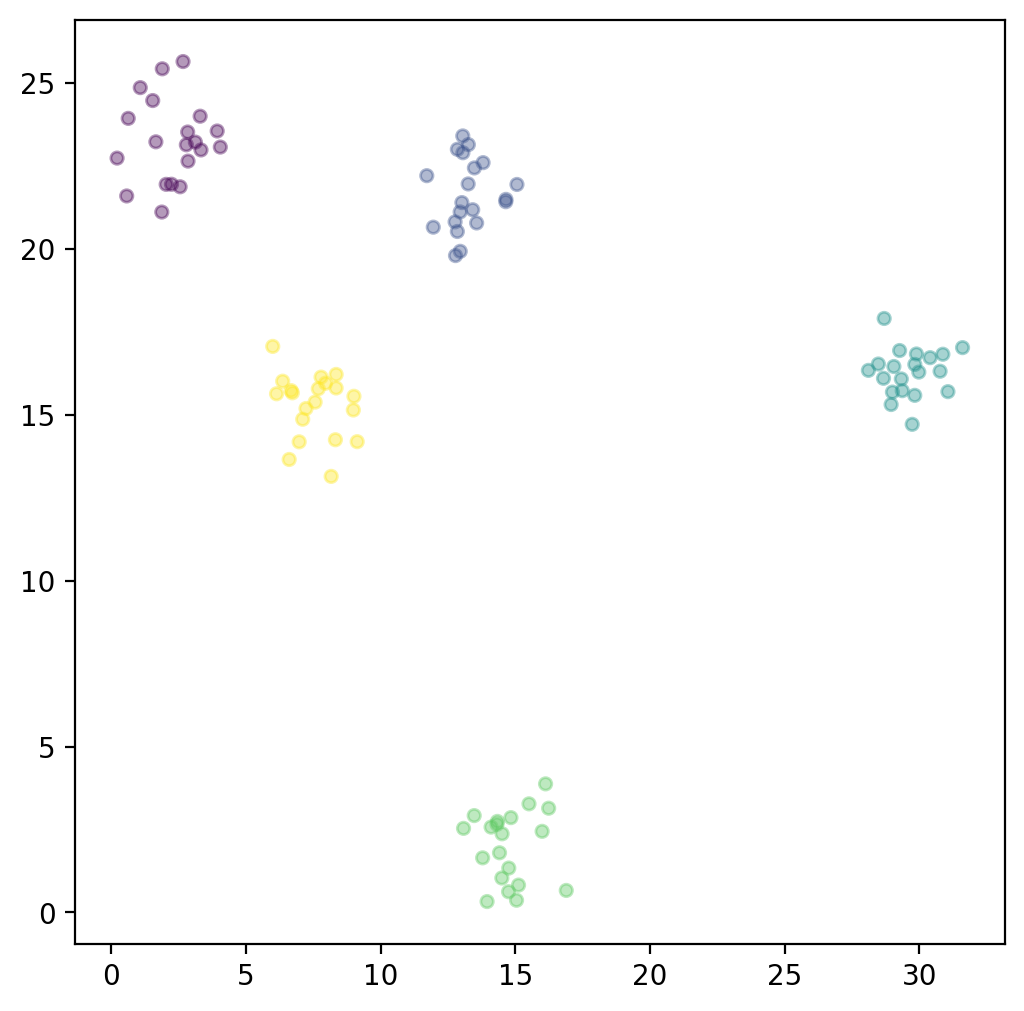

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, alpha=0.4)

## Scikit-learn: K-Means Clustering


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=N_CLUSTERS)
model

KMeans(n_clusters=5)

In [ ]:
model.fit(X)

KMeans(n_clusters=5)

In [ ]:
model.labels_

array([3, 0, 2, 4, 2, 3, 1, 0, 0, 0, 3, 4, 4, 0, 2, 3, 1, 1, 0, 2, 1, 4,
       4, 4, 1, 2, 3, 2, 0, 1, 4, 0, 0, 3, 2, 2, 4, 1, 4, 1, 3, 2, 3, 3,
       3, 4, 4, 3, 3, 4, 1, 2, 0, 0, 2, 0, 2, 4, 2, 4, 3, 3, 1, 1, 1, 3,
       3, 1, 0, 2, 1, 3, 0, 1, 0, 0, 2, 2, 2, 2, 4, 1, 4, 3, 3, 0, 4, 1,
       4, 1, 0, 0, 1, 4, 3, 0, 2, 1, 2, 4])

In [ ]:
model.cluster_centers_

array([[ 2.26593052, 23.24404493],
       [29.64149672, 16.27824686],
       [14.78949528,  2.00164529],
       [13.25719219, 21.63398675],
       [ 7.56180272, 15.27699616]])

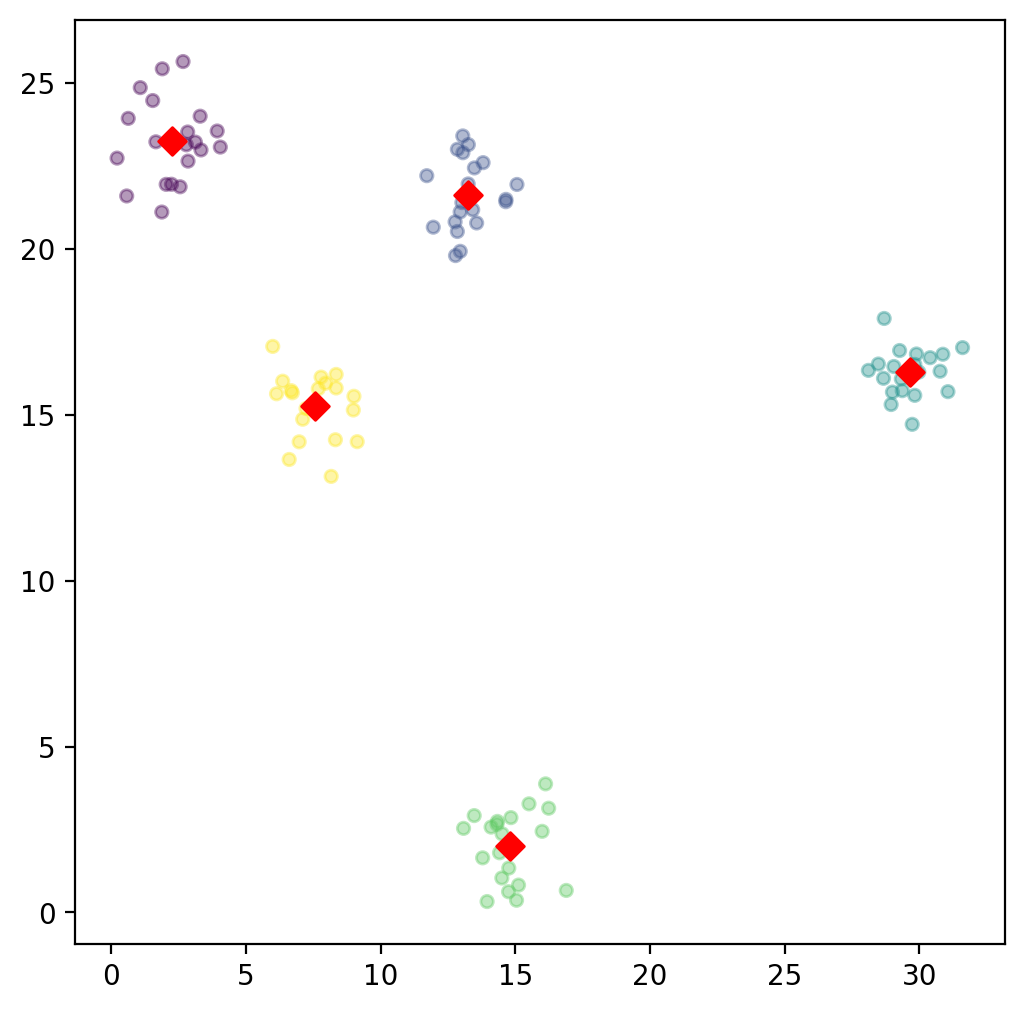

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, alpha=0.4)
plt.scatter(
    model.cluster_centers_[:, 0], # x
    model.cluster_centers_[:, 1], # y
    color="red",
    marker="D", # diamond
    s=50,
)

[[1, 14267.981038881935], [2, 6350.108043894181], [3, 2106.075051987967], [4, 1102.8160730278087], [5, 187.61478778826552], [6, 167.46746467149129]]


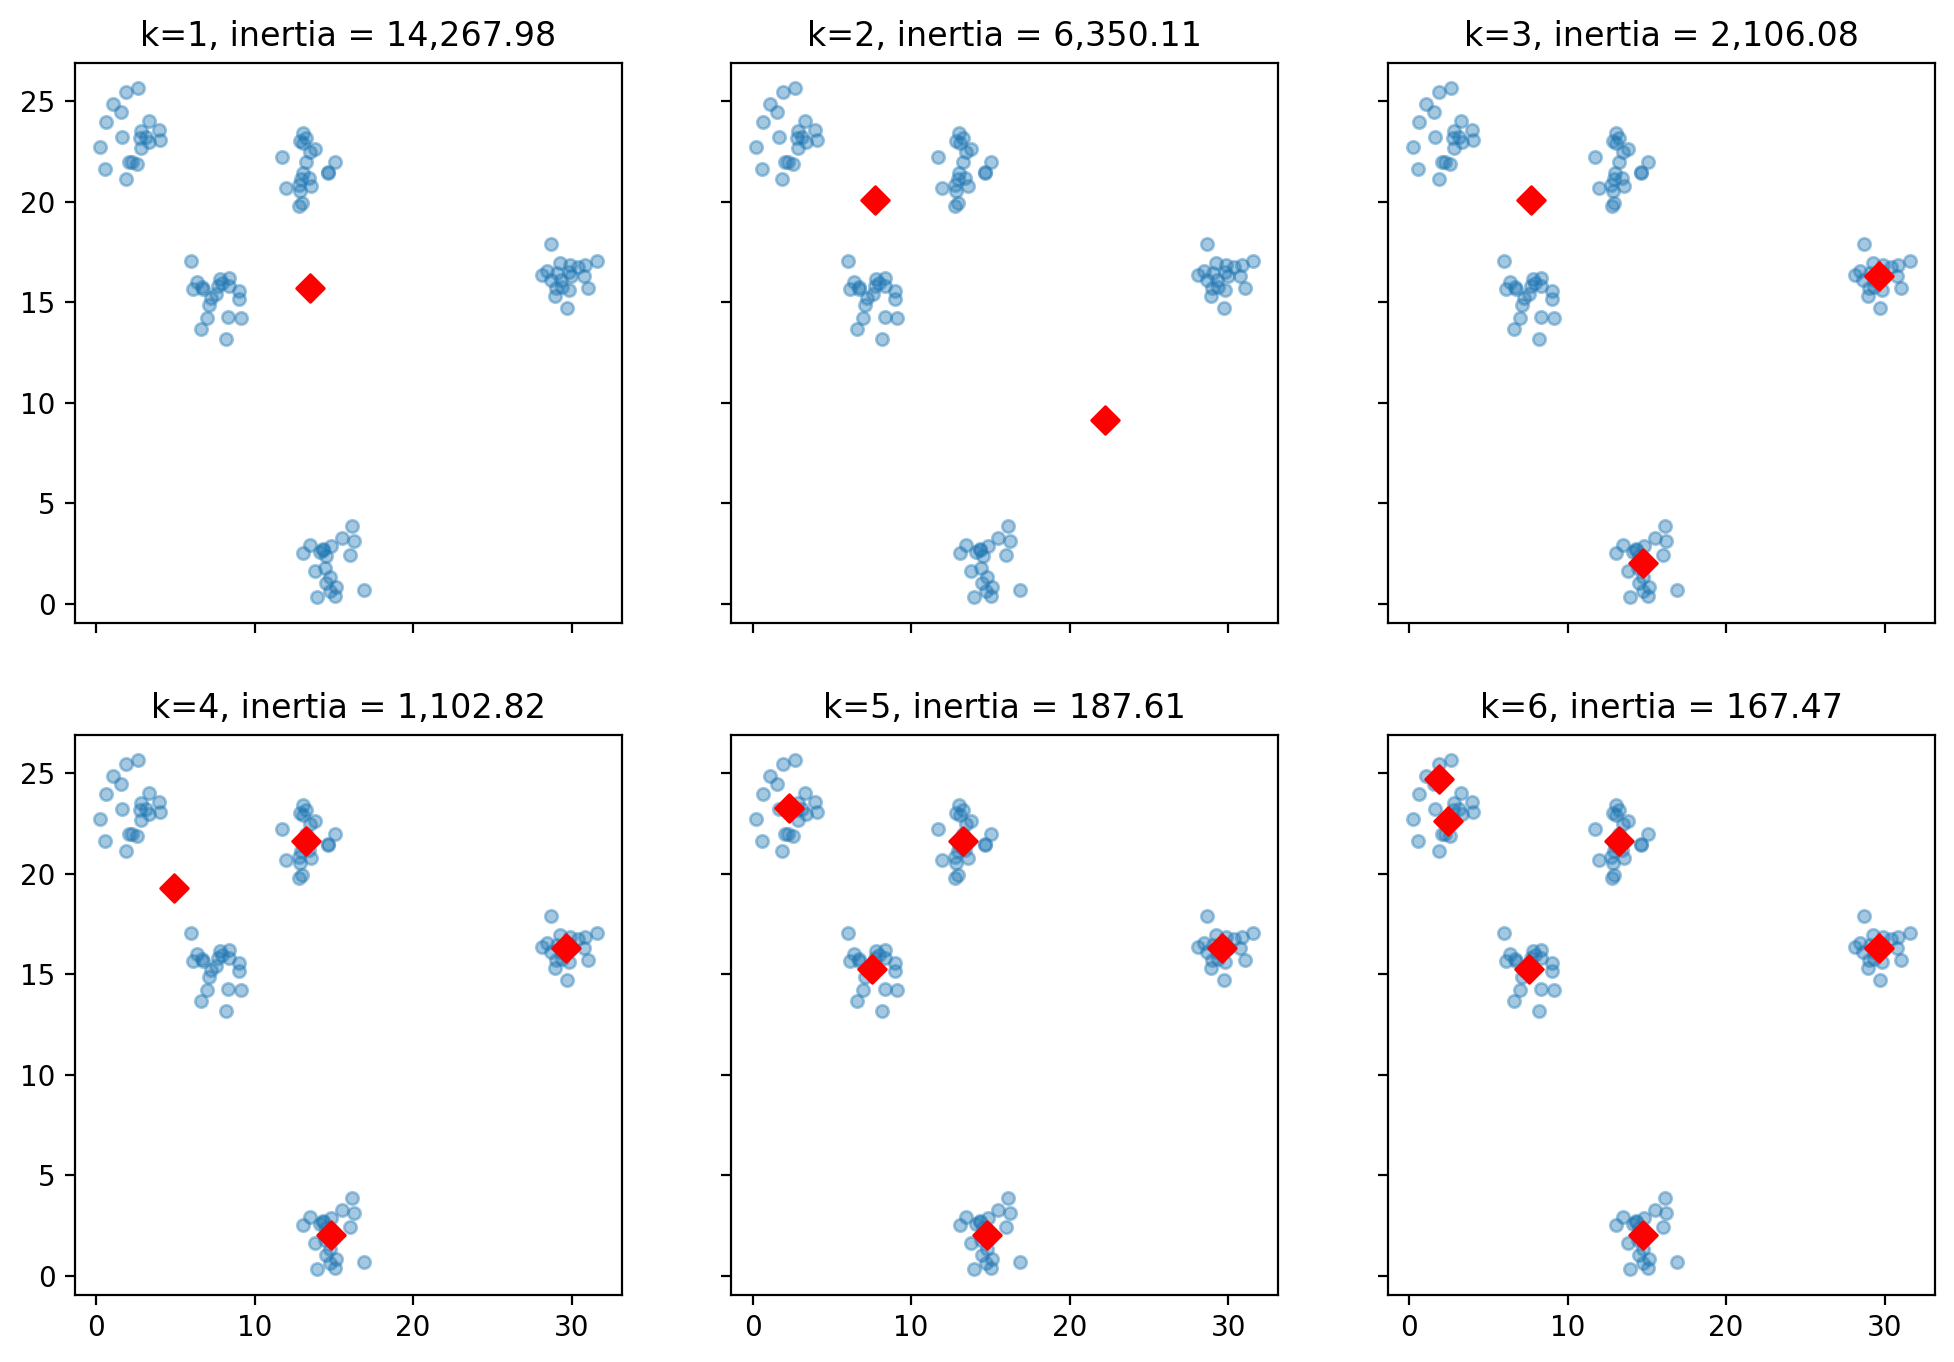

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
k = 1
ssd = (
    []
)  # (model.inertia_) Sum of squared distances of samples to their closest cluster center
ax = ax.ravel()
# ax.shape[0]
for i in range(ax.shape[0]):
    ax[i].scatter(X[:, 0], X[:, 1], s=20, alpha=0.4)
    #         ax[i].scatter(X[:, 0], X[:, 1], s=20, c=y, alpha=.4) # with cluster color
    m = KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
    ax[i].scatter(
        m.cluster_centers_[:, 0], m.cluster_centers_[:, 1], color="r", marker="D", s=50
    )
    ax[i].set_title(f"k={k}, inertia = {m.inertia_:,.2f}")
    k += 1
print(ssd)

In [ ]:
xy = np.array(ssd)
print(xy)

[[1.00000000e+00 1.42679810e+04]
 [2.00000000e+00 6.35010804e+03]
 [3.00000000e+00 2.10607505e+03]
 [4.00000000e+00 1.10281607e+03]
 [5.00000000e+00 1.87614788e+02]
 [6.00000000e+00 1.67467465e+02]]


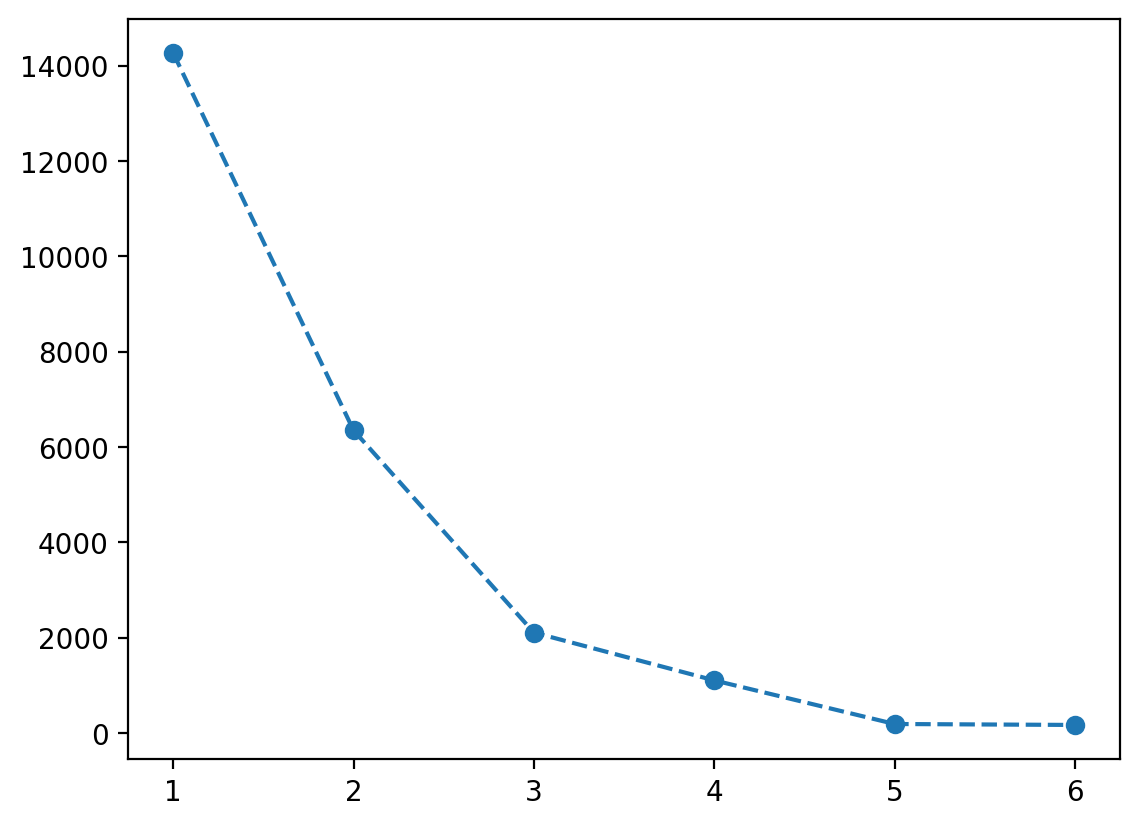

In [ ]:
plt.plot(xy[:, 0], xy[:, 1], linestyle="--", marker="o")
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [ ]:
dd = pd.DataFrame(ssd, columns=["k", "ssd"])
dd

,k,ssd
0,1,16015.808833
1,2,6684.339095
2,3,1714.469051
3,4,192.832853
4,5,170.758102
5,6,149.276253


In [ ]:
dd["pct_chg"] = dd["ssd"].pct_change()
dd

,k,ssd,pct_chg
0,1,16015.808833,NaN
1,2,6684.339095,-0.582641
2,3,1714.469051,-0.743510
3,4,192.832853,-0.887526
4,5,170.758102,-0.114476
5,6,149.276253,-0.125803


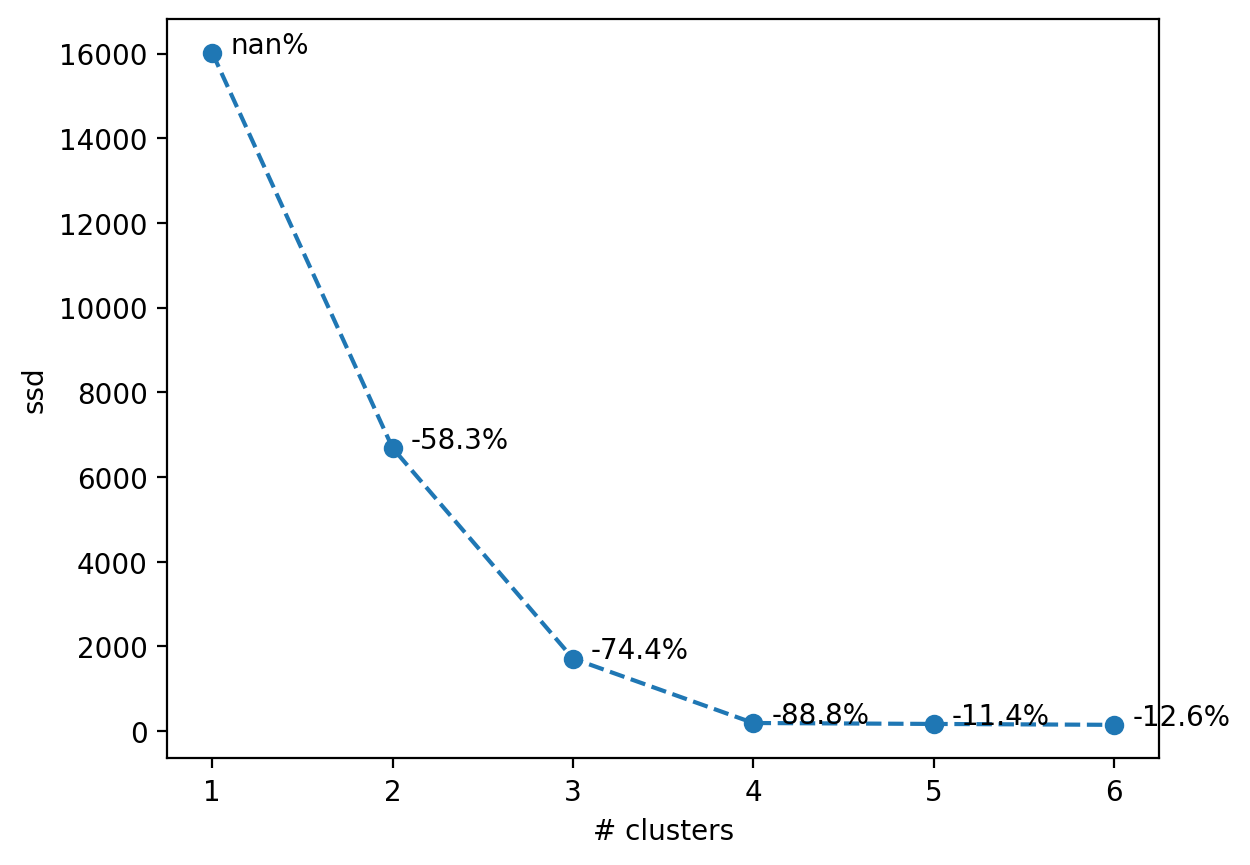

In [ ]:
plt.plot(dd["k"], dd["ssd"], linestyle="--", marker="o")
plt.xlabel("# clusters")
plt.ylabel("ssd")

# plt.plot(xy[:, 0], xy[:, 1], '--o')

for index, row in dd.iterrows():
    plt.text(row["k"] + 0.1, row["ssd"] + 0.1, f'{row["pct_chg"]:.1%}', fontsize=10)

In [ ]:
print(f"finished: {pd.Timestamp.now()}")

finished: 2024-04-10 08:18:19.165642
